# *세그멘테이션( Segmentation )*

## **목차**

---

##### 1. Segmentation이란?   
##### 2. 논리-물리 주소 변환 방법   
##### 3. Size에 따른 segment 고려 및 segmentation의 장단점
##### 4. Sementation가 OS에 주는 문제점

---

## **1. Segmentation이란이란?**
- 페이징과 같이 가상 메모리를 관리하는 기법 중 하나
- 이전 가상 메모리 할당은 프로세스의 전체 주소 공간을 한 번에 연속적으로 메모리에 할당하는 비효율적인 모습이 있었으나,
이를 해결하기 위헤 Segmentation 아이디어가 나옴
- 세그멘테이션은 프로세스를 논리적 내용을 기반으로 나눠서 메모리에 배치하는 것을 말함
     
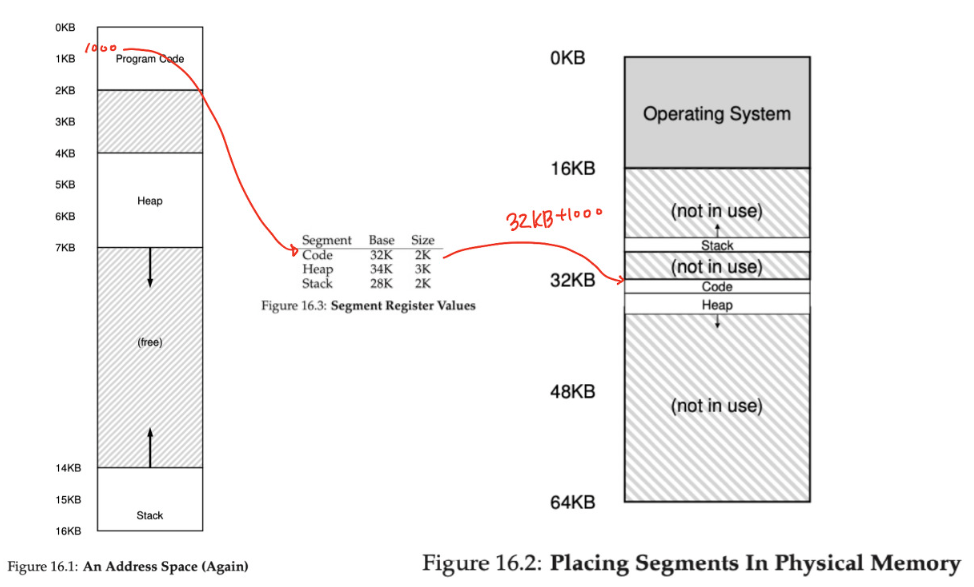

- Segment란 메모리에서 일정 부분을 뜻하며 일반적인 주소 공간은 3개의 segment(Code, Stack, Heap)으로 구성됨
- OS는 메모리에 3개의 Segment를 메모리에 배치하여 heap, Stack 사이의 공간을 낭비하지 않도록 하는 것


#### 2. 논리-물리 주소 변환 방법   

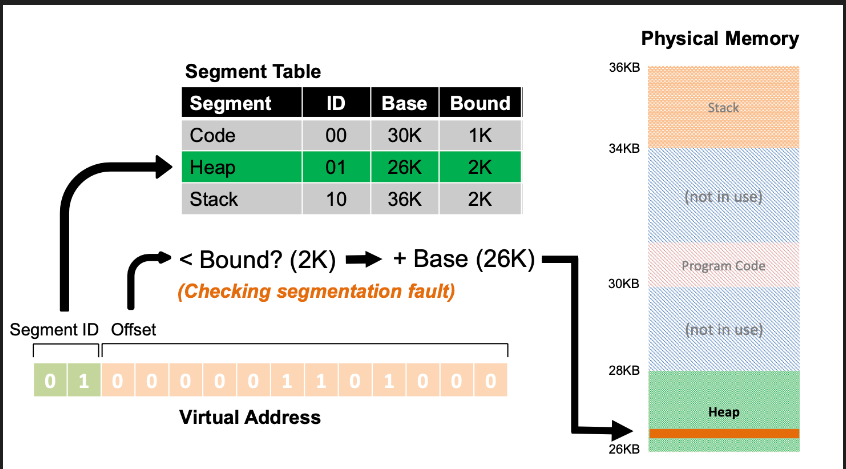   

1. Segment ID가 01인 Heap 영역에 가서 Base 값을 찾는다. (Base = 26K)

2. Offset 을 계산한다. (16진수 Hex -> 10진수 Decimal)
    - 0x068 -> (Decimal) (16^1 * 6) + (16^0 * 8) = 104

3.  segmentation fault 발생하는지 확인한다.
(segmentation fault : 프로그램이 허용되지 않은 메모리 영역에 접근을 시도하거나(free 공간),   
허용되지 않은 방법으로 메모리 영역에 접근을 시도할 경우 발생한다)

4.  Physical memory 주소를 찾는다. (base + offset)
    - Segment ID가 01인 Heap 영역에서 Base 값과 offset 값을 더하면 된다.
    - 따라서 실제 메모리 주소는 26KB + 104가 된다.

+ Stack은 Heap, Code 부분과 다르게 거꾸로 확장되므로 Grows Positive Value를 주어 가상주소를 변환한다.

#### 3. Size 에 따른 segment 고려 및 Segmentation의 장단점
- 위에는 3개의 segment만 존재하는 시스템만 고려했으나 실제는 그렇지 않음
- Size가 큰 소수의 segment VS Size 작은 다수의 segment 를 고려해볼 때 각각의 장단점이 존재함
    - Size가 큰 소수의 segment
        - segment의 수가 줄어들어 관리가 편하지만 다소 단순하게 구성할 수 밖에 없음
    - Size가 작은 다수의 segment
        - 유연하게 메모리를 구성할 수 있지만 segment가 많아 관리가 힘듦



1. Segmentation의 장점

    - 효과적인 메모리 가상화
    - 동적 재배치 가능
    - Sparse address space (드문드문 사용되는 주소공간) 어느정도 개선
    - 세그멘테이션에 필요한 산술연산은 쉽고, 하드웨어 구현에 적합하여 속도가 빠름
    - 변환 오버헤드가 최소
    - 코드가 별도 세그먼트에 존재한다면, 여러 프로그램에서 공유 가능

2. Segmentation의 단점

    - Segment의 크기가 일정하지 않아 외부 단편화 발생
    - Sparse address space (드문드문 사용되는 주소공간)를 지원할 만큼 충분히 유연하지는 못함
        - 크기가 크지만, 드문드문 사용되는 힙이 하나의 논리적인 세그먼트에 배정된 경우   
        -> 이 힙에 접근하려면, 힙 전체가 여전히 물리 메모리에 존재해야함
        - 즉 주소 공간이 사용되는 모델과, 이를 지원하기 위한 세그멘테이션 설계 방법이 정확히 일치해야함


#### 4. Sementation가 OS에 주는 문제점

1. Context-Switch(문맥 교환) 문제
    - Segment table을 어떻게 관리할 것인가?

2. Segment의 수가 증가하거나 감소할 때 OS와의 상호 작용 문제
    - Segment table의 크기 감소 및 증가
    - Segment 증가로 인한 메모리 단편화 증가
    - 운영체제의 복잡성 증가

3. 실제 메모리의 여유 공간 관리
    - 아래 그림에서 왼쪽 메모리에 20KB 크기를 갖는 segment를 할당하려고 함   
    하지만 연속적으로 20KB 이상을 갖는 공간은 없음

    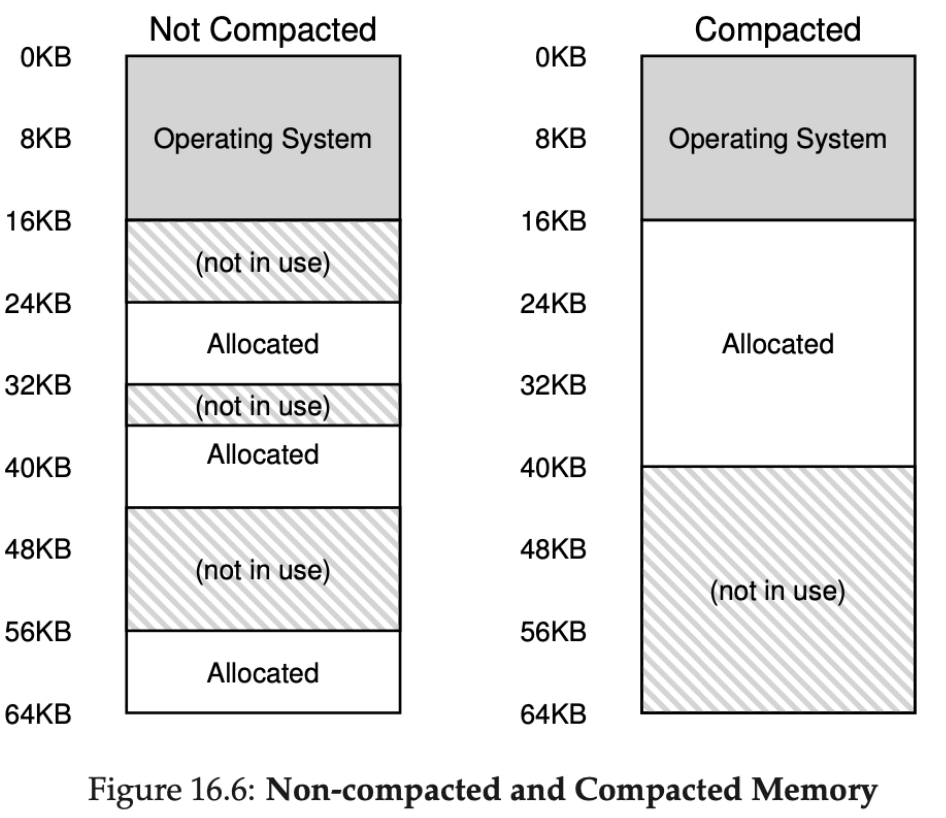   

    - 문제 해결 방안
        - 이를 해결하기 위해 compact 공간을 확보하는 것
        - 다만, 이런 요청을 처리하기 위해 또 다시 메모리 재배치가 필요하기 때문에 새로운 비용이 발생됨
        - 메모리 재배치는 여러가지 알고리즘이 존재하지만 아무리 잘 만들어도 외부 단편화는 없앨 수 없음
